# Simulating the effects of PKOs on battle-related deaths

## Components
This first go is a very simple model. It only consists of:
- Number of starting battle-related deaths
- Number of PKO troops
- Months

In [1]:
import simpy
import matplotlib.pyplot as plt
import numpy as np

from modsim import *

In [2]:


def deploy_pko_troops(starting_brds, num_troops, num_months):
    brds = []
    months = 0
    #month_array = np.array([])
    month_array = []
    for i in range(num_months):
        if starting_brds > 0:
            # Hultman, Kathman, and Shannon find 10,000 troop reduce
            # BRDs by 6 per month
            effect_of_pko = num_troops * .0006
            starting_brds -= effect_of_pko
            months += 1
            brds.append(starting_brds)
            month_array.append(months)
    plt.plot(month_array, brds)        

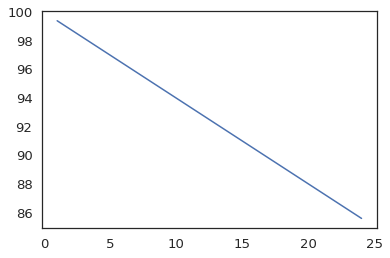

In [3]:
deploy_pko_troops(100, 1000, 24)

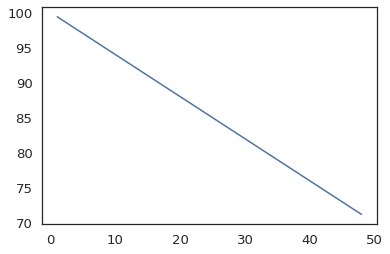

In [4]:
deploy_pko_troops(100, 1000, 48)

Accounting for toops being deployed each month.

In [5]:
def deploy_pko_troops(starting_brds, troop_rate, num_months):
    brds = []
    months = 0
    #month_array = np.array([])
    month_array = []
    for i in range(num_months):
        if starting_brds > 0:
            # Hultman, Kathman, and Shannon find 10,000 troop reduce
            # BRDs by 6 per month
            num_troops = i * troop_rate
            effect_of_pko = num_troops * .0006
            starting_brds -= effect_of_pko
            months += 1
            brds.append(starting_brds)
            month_array.append(months)
    plt.plot(month_array, brds)

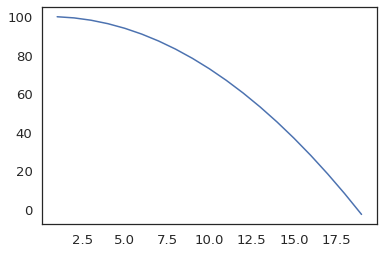

In [6]:
deploy_pko_troops(100, 1000, 48)

Now adding an upper limit to the number of troops deployed

In [7]:
def decorate_plot():
    """Add title and label to axes."""
    decorate(title='',
             xlabel='Months',
             ylabel='')

In [18]:
def deploy_pko_troops():
    starting_brds = int(input("How many BRDs a currently occuring per month? "))
    troop_rate = int(input("How many troops will be deployed per month? "))
    total_troops = int(input("How many total troops will be deployed? "))
    num_months = int(input("How many months will the opperation last? "))
    brds = []
    months = 0
    #month_array = np.array([])
    month_array = []
    for i in range(num_months):
        num_troops = i * troop_rate
        if num_troops < total_troops and starting_brds > 0:
            # Hultman, Kathman, and Shannon find 10,000 troop reduce
            # BRDs by 6 per month
            effect_of_pko = num_troops * .0006
            starting_brds -= effect_of_pko
            months += 1
            brds.append(starting_brds)
            month_array.append(months)
            
        if num_troops >= total_troops and starting_brds > 0:
            effect_of_pko = total_troops * .0006
            starting_brds -= effect_of_pko
            months += 1
            brds.append(starting_brds)
            month_array.append(months)
            
        if starting_brds <= 0:
            print("\nBy deploying", str(troop_rate), "troops a month",
                  "\nuntil a total of", str(total_troops),
                  "troops are deployed, \nbattle-related deaths hit 0 after", 
                  str(months), "months")
            plt.plot(month_array, brds, label='BRDs')
            decorate_plot()
            return
        
        if i >= max(num_months) and starting_brds > 0:
            print("\nBy deploying", str(troop_rate), "troops a month",
                  "\nuntil a total of", str(total_troops),
                  "troops are deployed, \nbattle-related deaths never hit 0", 
                  str(months), "months")
            plt.plot(month_array, brds, label='BRDs')
            decorate_plot()
            return
        


How many BRDs a currently occuring per month? 100
How many troops will be deployed per month? 10000
How many total troops will be deployed? 100000
How many months will the opperation last? 100

By deploying 10000 troops a month 
until a total of 100000 troops are deployed, 
battle-related deaths hit 0 after 7 months


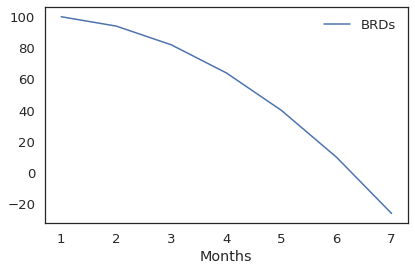

In [19]:
deploy_pko_troops()